In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter, StrMethodFormatter
import warnings

In [2]:
#mit Komma und 2 Nachkommastellen
def comma_formatter(x, pos):
    return "{:,.2f}".format(x).replace(".", ",")
formatter = FuncFormatter(comma_formatter)

In [3]:
np.random.seed(42)

# 1. Einlesen der Daten

In [4]:
cd = r"C:\Users\Administrator\Nextcloud\MA_Aicha Platzdasch\Input_Grünenthal\2_Daten"
path = os.path.join(cd, "240731_Energiedaten_2023_Komplett.xlsx")
path_bhkw = os.path.join(cd, "240731_Energiedaten_307_2023.xlsx")
path_strom_pr_em = os.path.join(cd, "231231StromPreisEmissionsfaktorAgora.csv")

## 1.1 Grünenthal-Daten

### 1.1.1 Excel mit fast allen Bedarfen

In [5]:
# Suppress the warning about the default style
warnings.simplefilter(action='ignore', category=UserWarning)

df = pd.read_excel(path)
df.set_index('Datum', inplace=True)
df.index = pd.to_datetime(df.index, format='%d.%m.%Y  %H:%M')

# df_2023 = df[df.index.year == 2023] # diesen Filter nicht mehr, da in der Excel nur 2023er Daten drin sind, aber der "Bis-Zeitstempel" also ab 1.1.23 1 Uhr bis 1.1.24 0 Uhr
df_2023 = df

df_2023.reset_index(drop=True, inplace=True)
df_2023.index = df_2023.index + 0 # macht Index ab 0, ... + 1 macht Index ab 1

# Zahlenformat 1000,00 bereits richtig konvertiert in 1000.00

### 1.1.2 Excel mit BHKW-Zeitreihen

In [6]:
# Suppress the warning about the default style
warnings.simplefilter(action='ignore', category=UserWarning)

df_bhkw = pd.read_excel(path_bhkw)
df_bhkw.set_index('Datum', inplace=True)
df_bhkw.index = pd.to_datetime(df_bhkw.index, format='%d.%m.%Y  %H:%M')

# df_bhkw_2023 = df_bhkw[df_bhkw.index.year == 2023] # diesen Filter nicht mehr, da in der Excel nur 2023er Daten drin sind, aber der "Bis-Zeitstempel" also ab 1.1.23 1 Uhr bis 1.1.24 0 Uhr
df_bhkw_2023 = df_bhkw

df_bhkw_2023.reset_index(drop=True, inplace=True)
df_bhkw_2023.index = df_bhkw_2023.index + 0 # macht Index ab 0, ... + 1 macht Index ab 1

# Zahlenformat 1000,00 bereits richtig konvertiert in 1000.00

In [ ]:
columns_df_2023 = set(df_2023.columns)
columns_df_bhkw_2023 = set(df_bhkw_2023.columns)

unique_columns_df_2023 = columns_df_2023 - columns_df_bhkw_2023

unique_columns_df_bhkw_2023 = columns_df_bhkw_2023 - columns_df_2023

unique_columns_df_2023_list = list(unique_columns_df_2023)
unique_columns_df_bhkw_2023_list = list(unique_columns_df_bhkw_2023)

print("Spalten, die nur in df_2023 vorkommen:", unique_columns_df_2023_list)
print("Spalten, die nur in df_bhkw_2023 vorkommen:", unique_columns_df_bhkw_2023_list)

Spalten, die nur in df_2023 vorkommen: ['Heißwasser Geb. 301 gesamt - ∅ - kW', 'Heißwassererzeugung Geb. 702 aus Dampf - ∅ - kW', 'Heizungswasser Geb. 609 gesamt - ∅ - kW', 'Heißwasser Geb. 601 + 603 + 605 gesamt - ∅ - kW', 'Heißwasser Geb. 604 / 608 gesamt - ∅ - kW', 'Heißwasser Geb. 407 + 408 gesamt - ∅ - kW', 'Stromzähler W5 20kV-Einspeisung Neuenhofstr. (Geb. 603) - ∅ - kW', 'Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kW', 'Stromzähler W5 20kV-Ausspeisung Neuenhofstr. (Geb. 603) - ∅ - kW', 'Heißwasser Geb. 201 gesamt - ∅ - kW', 'Stromzähler W5 20kV-Einspeisung Kaubendenstr. (Geb. 809) - ∅ - kW', 'Heißwasser Geb. 305 Lüftung + 306 gesamt - ∅ - kW', 'Heißwasser Geb. 302 gesamt - ∅ - kW', 'Heißwasser Geb. 401 gesamt - ∅ - kW', 'Stromzähler W5 20kV-Ausspeisung Kaubendenstr. (Geb. 809) - ∅ - kW', 'Heißwasser Geb. 305 stat. Heizung + 202 302 308 303 - ∅ - kW']
Spalten, die nur in df_bhkw_2023 vorkommen: ['Stromzähler Geb. 307 NSHV Trafo 1 - ∅ - kW', 'Kaltwasser Geb. 307 gesamt - ∅ - kW',

## 1.2 csv mit Strompreisen und -emissionen

Quelle: Agorameter (Preis ist Day-Ahead DE-LU)

In [7]:
df_strom_pr_em = pd.read_csv(path_strom_pr_em)
df_strom_pr_em.set_index('date_id', inplace=True)
df_strom_pr_em.index = pd.to_datetime(df_strom_pr_em.index, format='%Y-%m-%dT%H:%M:%S')

# Droppe die zweite Spalte, da sie ein Duplikat der ersten ist
df_strom_pr_em.drop(df_strom_pr_em.columns[0], axis=1, inplace=True)

df_strom_pr_em_2023 = df_strom_pr_em[df_strom_pr_em.index.year == 2023]

### Umgang mit NaN values

In [8]:
full_date_range = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')

missing_dates = full_date_range.difference(df_strom_pr_em_2023.index)

missing_dates_count = len(missing_dates)
print(missing_dates_count)
print(missing_dates)

df_strom_pr_em_2023 = df_strom_pr_em_2023.reindex(full_date_range)

df_strom_pr_em_2023 = df_strom_pr_em_2023.interpolate(method='linear')

1
DatetimeIndex(['2023-03-26 02:00:00'], dtype='datetime64[ns]', freq='h')


In [9]:
df_strom_pr_em_2023.reset_index(drop=True, inplace=True)
df_strom_pr_em_2023.index = df_strom_pr_em_2023.index

In [8]:
df_strom_pr_em_2023.to_pickle("StromPreisEmissionen.pkl")

# 2. Bedarfe rausziehen

## 2.1 Strom aus BHKW und Netz

In [10]:
strom = df_bhkw_2023["Stromzähler Geb. 307 BHKW Generator Einspeisung - ∅ - kW"] + df_2023["Stromzähler W5 20kV-Einspeisung Kaubendenstr. (Geb. 809) - ∅ - kW"]

## 2.2 Raumwärme

 Heizungswasser von BHKW307-Netz zu Geb. 201 301 401 - ∑ - kWh und Heißwasser, was für Raumheizung verwendet wird

In [11]:
heizungswasser = df_bhkw_2023["Heizungswasser von BHKW307-Netz zu Geb. 201 301 407 - ∅ - kW"]

Ich hab mich  heute mit Herrn Peters, dem Energiemanager von Grünenthal, zusammen geschaltet und wir sind die Daten mal durch gegangen:
Der Prozessdampf für das eine Gebäude liegt bei 120-150 kW. Immer etwas schwer abzuschätzen, nehmen wir mal 140 als Wert.
Es gibt einen zweiten Prozess, der aktuell Dampf verwendet, der kann aber ohne Probleme auf Heizungswasser umgestellt werden - und das soll auch zeitnah geschehen.
Ein Dritter Prozess mit Reindampferzeuger lässt sich nicht auseinanderrechnen. Das schwankt zu sehr zwischen 30 und 180 kW mit Heizung und sonst was auf dem gleichen Zähler. Nach Rücksprache mit Herrn Peters ist die bessere Variante, wenn wir die Wärme einfach aufs Heizungswasser umlegen und im Zweifel etwas überschätzen.

Zusätzlich zu den 140 kW Prozessbedarf kommen noch insgesamt 350 kW durch Leitungsverluste dazu, die wir abziehen müssen.
Das heißt für die Daten: 490 kW runter rechnen, schauen dass wir >=0 sind und das als (neuen) Heizungsbedarf annehmen.

In [12]:
heisswasser = df_bhkw_2023["Heißwassererzeugung Geb. 307 aus BHKW - ∅ - kW"] - 490
heisswasser = heisswasser.clip(lower=0) # Alle Werte, die nach dem Abzug von 490 kW negativ wären, werden auf 0 gesetzt.

schon hier addieren, damit nur die Insgesamt-Ausreißer bearbeitet werden

In [13]:
heizungswasser = heizungswasser + heisswasser

## 2.3 NaN und Fehler beheben

### 2.1.1 process_series für Extremwerte

Um vor dem Setzen der Extremwerte als NaN eine Abfrage zu machen, ob diese Extremwerte Ausreißer sind, kann die Verwendung des Interquartilabstands (IQR) helfen. Werte, die außerhalb von 1,5 mal dem IQR über dem dritten Quartil oder unter dem ersten Quartil liegen, werden üblicherweise als Ausreißer betrachtet.

In [14]:
def process_series(ser):
    ser = ser.copy()

    if not isinstance(ser, pd.Series):
        raise TypeError('Die Eingabe muss eine pandas Series sein.')

    def is_outlier(value, lower_bound, upper_bound):
        return value < lower_bound or value > upper_bound

    # Anzahl der NaN-Werte vor dem Setzen von Extremwerten zu NaN
    num_nans_before = ser.isna().sum()
    print(f'Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: {num_nans_before}')

    # Extremwerte (Maximum und Minimum)
    max_value = ser.max(skipna=True)
    min_value = ser.min(skipna=True)
    print(f'Maximum: {max_value}')
    print(f'Minimum: {min_value}')

    # Median als Referenz (Nullwerte rausrechnen, da BHKW-Zeitreihen viele 0-Werte enthalten)
    ser_non_zero = ser[ser != 0]
    median_value = ser_non_zero.median(skipna=True)
    print(f'Median: {median_value}')
  
    # IQR-Methode zur Ausreißererkennung
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Überprüfe, ob Extremwerte Ausreißer sind
    max_is_outlier = is_outlier(max_value, lower_bound, upper_bound)
    min_is_outlier = is_outlier(min_value, lower_bound, upper_bound)

    if max_is_outlier:
        response = input(f'Das Maximum ({max_value}) ist ein Ausreißer. Soll es ersetzt werden? (ja/nein): ')
        if response.lower() == 'ja':
            ser[ser == max_value] = np.nan

    if min_is_outlier:
        response = input(f'Das Minimum ({min_value}) ist ein Ausreißer. Soll es ersetzt werden? (ja/nein): ')
        if response.lower() == 'ja':
            ser[ser == min_value] = np.nan

    # Anzahl der NaN-Werte nach dem Setzen von Extremwerten zu NaN
    num_nans_after = ser.isna().sum()
    print(f'Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: {num_nans_after}')

    # Interpoliere alle NaN-Werte auf einmal
    ser_final_interpolated = ser.interpolate(method='linear')

    return ser_final_interpolated

Maximum hier nicht als Ausreißer ansehen, das Minimum schon.
Stromzähler sind sehr genau.

In [15]:
strom = process_series(strom)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 3081.83
Minimum: 685.88
Median: 1907.94
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 2


2x durchlaufen lassen bis es keine Ausreißer mehr gibt (Maxima)

In [17]:
heizungswasser = process_series(heizungswasser)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 0
Maximum: 13425126.48
Minimum: 0.0
Median: 900.04
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 1


### 2.1.2 Ausreißeruntersuchung, qualitativ

Sinken die anderen Bedarfe zu dem Zeitpunkt, indem Heizungswasserverbräuche besonders hoch sind?

In [106]:
filtered_indices = heizungswasser[heizungswasser > 3000].index
filtered_indices

Index([ 199,  315,  633,  730,  816,  916, 1316, 1389, 1409, 1447, 1485, 1578,
       1684, 1804, 1923, 2079, 2217, 2242, 2337, 2411, 2426, 2725, 2790, 2988,
       3468, 3810, 5281, 6460, 6636, 7013, 7034, 7037, 7141, 7359, 7451, 7549,
       7625, 7644, 7896, 7969, 8081, 8192, 8362, 8379, 8521],
      dtype='int64')

In [36]:
# gastest = df_bhkw_2023["Gasverbrauch Geb. 307 BHKW - ∅ - kW"]*0.8493
# gastest = df_2023["Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kW"]*0.8493
stromtest = df_bhkw_2023["Stromzähler Geb. 307 BHKW Generator Einspeisung - ∅ - kW"] + df_2023["Stromzähler W5 20kV-Einspeisung Kaubendenstr. (Geb. 809) - ∅ - kW"]
heizungswassertest_all = df_bhkw_2023["Heizungswasser von BHKW307-Netz zu Geb. 201 301 407 - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 Absorbtionskälte - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 Notkühler - ∅ - kW"]
heizungswassertest = df_bhkw_2023["Heizungswasser von BHKW307-Netz zu Geb. 201 301 407 - ∅ - kW"]
heisswassertest = df_bhkw_2023["Heißwassererzeugung Geb. 307 aus BHKW - ∅ - kW"]

In [37]:
heisswassertest = process_series(heisswassertest)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 2640.26
Minimum: 0.0
Median: 989.01
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 1


In [40]:
heizungswassertest_all = process_series(heizungswassertest_all)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 0
Maximum: 4938.54
Minimum: 0.0
Median: 1004.46
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 0


In [43]:
heizungswassertest = process_series(heizungswassertest)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 0
Maximum: 1993.36
Minimum: 0.0
Median: 989.01
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 0


In [44]:
stromtest = process_series(stromtest)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 3081.83
Minimum: 685.88
Median: 1907.94
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 2


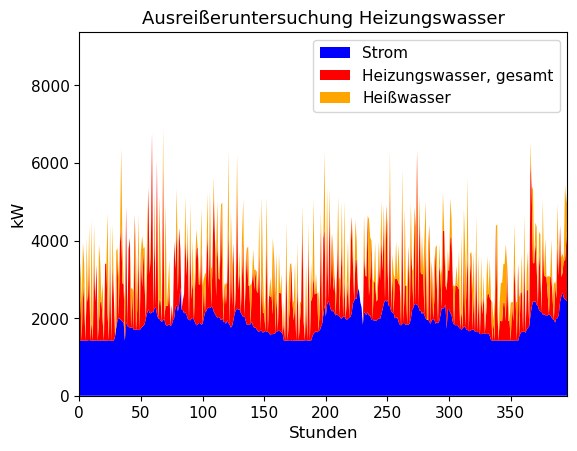

In [45]:
idx=198
plt.figure(figsize=(16/2.54, 12/2.54))
plt.stackplot(stromtest.index, stromtest, heizungswassertest_all, heisswassertest, labels=['Strom', 'Heizungswasser, gesamt', 'Heißwasser'], colors=['blue', 'red', 'orange'])
# plt.plot(gastest.index, gastest, label='Gas', color='green', linewidth=2)
plt.legend(fontsize=11)
plt.xlim(idx - 198, idx + 198)
plt.xlabel("Stunden", fontsize=12)
plt.ylabel("kW", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title("Ausreißeruntersuchung Heizungswasser", fontsize=13)
plt.show()

Weiterbehandlung falls Extremwerte = outlier/Ausreißer

Ja, outlier bei Raumwärme, weil andere Bedarfe zu den Zeitpunkten nicht sinken

### 2.1.3 process_outliers für Ausreißer

"Ganz normal"

In [18]:
def process_outliers(ser):
    if not isinstance(ser, pd.Series):
        raise TypeError('Die Eingabe muss eine pandas Series sein.')

    def is_outlier(value, lower_bound, upper_bound):
        return value < lower_bound or value > upper_bound

    # IQR-Methode zur Ausreißererkennung
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Median als Referenz
    median_value = ser.median(skipna=True)
    print(f'Median: {median_value}')

    # Überprüfe alle Daten auf Ausreißer und setze sie auf NaN
    outliers = ser.apply(lambda x: np.nan if is_outlier(x, lower_bound, upper_bound) else x)

    # Ausgabe der Ausreißer und ihrer Indizes
    outlier_values = ser[~ser.isin(outliers)]
    print(f'Ausreißer-Werte: {outlier_values.dropna().tolist()}')
    outlier_indices = outlier_values.index
    print(f'Ausreißer-Indizes: {outlier_indices.tolist()}')
    num_outliers = len(outlier_values.dropna())
    print(f'Anzahl der Ausreißer: {num_outliers}')

    response = input(f'Sollen die Ausreißer ersetzt werden? (ja/nein): ')
    if response.lower() == 'ja':
        # Anzahl der NaN-Werte nach dem Setzen der Ausreißer zu NaN
        num_nans_after = outliers.isna().sum()
        print(f'Anzahl der NaN-Werte nach dem Setzen aller Ausreißer auf NaN: {num_nans_after}')

        # Interpoliere alle NaN-Werte auf einmal
        ser_final_interpolated = outliers.interpolate(method='linear')
        return ser_final_interpolated

    return ser

Für die Zeitreihen mit vielen Nullwerten

In [19]:
import pandas as pd
import numpy as np

def process_outliers_000(ser):
    if not isinstance(ser, pd.Series):
        raise TypeError('Die Eingabe muss eine pandas Series sein.')

    def is_outlier(value, lower_bound, upper_bound):
        return value < lower_bound or value > upper_bound

    # Filtern der Serie, um Nullwerte auszuschließen
    ser_non_zero = ser[ser != 0]

    # IQR-Methode zur Ausreißererkennung nur auf die Serie ohne 0-Werte anwenden
    Q1 = ser_non_zero.quantile(0.25)
    Q3 = ser_non_zero.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Median als Referenz
    median_value = ser_non_zero.median(skipna=True)
    print(f'Median: {median_value}')

    # Überprüfe alle Daten auf Ausreißer und setze sie auf NaN
    outliers = ser.apply(lambda x: np.nan if is_outlier(x, lower_bound, upper_bound) else x)

    # Ausgabe der Ausreißer und ihrer Indizes
    outlier_values = ser[~ser.isin(outliers)]
    print(f'Ausreißer-Werte: {outlier_values.dropna().tolist()}')
    outlier_indices = outlier_values.index
    print(f'Ausreißer-Indizes: {outlier_indices.tolist()}')
    num_outliers = len(outlier_values.dropna())
    print(f'Anzahl der Ausreißer: {num_outliers}')

    response = input(f'Sollen die Ausreißer ersetzt werden? (ja/nein): ')
    if response.lower() == 'ja':
        # Anzahl der NaN-Werte nach dem Setzen der Ausreißer zu NaN
        num_nans_after = outliers.isna().sum()
        print(f'Anzahl der NaN-Werte nach dem Setzen aller Ausreißer auf NaN: {num_nans_after}')

        # Interpolation nur mit Werten, die nicht 0 sind
        mask_non_zero = (ser != 0)  # Maske, um 0-Werte zu ignorieren
        ser_interpolated = outliers.where(mask_non_zero).interpolate(method='linear', limit_direction='both')

        # Für die verbleibenden NaN-Werte, die von 0-Werten umgeben sind, diese zurücksetzen
        ser_final = outliers.combine_first(ser_interpolated)
        
        return ser_final

    return ser


In [20]:
(heizungswasser == 0).sum()

3393

Ausreißer interpolieren

In [21]:
heizungswasser = process_outliers_000(heizungswasser)

Median: 900.04
Ausreißer-Werte: [3461.7, 3457.36, 3423.04, 3418.8, 3440.14, 3401.9, 3393.5, 3397.68, 3395.59, 3397.68, 3397.68, 3448.74, 3461.7, 3466.04, 3474.76, 3461.7, 3466.04, 3457.36, 3453.04, 3453.04, 3461.7, 3461.7, 3457.36, 3453.04, 3461.7, 3448.74, 3444.42, 3457.36, 3470.4, 3466.04, 3470.4, 3474.76, 3479.12, 3461.7, 3466.04, 3461.7, 3461.7, 3461.7, 3461.7, 3474.76, 3461.7, 3453.04, 3448.74, 3448.74, 3479.12]
Ausreißer-Indizes: [199, 315, 633, 730, 816, 916, 1316, 1389, 1409, 1447, 1485, 1578, 1684, 1804, 1923, 2079, 2217, 2242, 2337, 2411, 2426, 2725, 2790, 2988, 3468, 3810, 5281, 6460, 6636, 7013, 7034, 7037, 7141, 7359, 7451, 7549, 7625, 7644, 7896, 7969, 8081, 8192, 8362, 8379, 8521]
Anzahl der Ausreißer: 45


Anzahl der NaN-Werte nach dem Setzen aller Ausreißer auf NaN: 45


Stromwerte sind keine Ausreißer. Stromzähler sehr genau.

In [22]:
strom = process_outliers(strom)

Median: 1907.96
Ausreißer-Werte: [2993.81, 2991.66, 2967.81, 2976.29, 2956.86, 3077.85, 3081.83, 2938.17, 3045.0, 3014.98, 2948.38, 2948.85, 2982.16, 3045.6800000000003]
Ausreißer-Indizes: [4089, 4090, 4593, 4597, 5648, 5649, 5651, 5652, 5963, 5964, 5965, 5966, 6106, 6442]
Anzahl der Ausreißer: 14


# 3. Preise und Emissionen rausziehen

## 3.1 Strom

### 3.1.1 Basisszenario Preise und Emissionen

commodityCostTimeSeries – if specified, indicates commodity cost rates for each location and each time step, if required also for each investment period, by a positive float. The values are given as specific values relative to the commodityUnit for each time step.
* the default value is None


commodityRevenueTimeSeries – if specified, indicates commodity revenue rate for each location and each time step, if required also for each investment period, by a positive float. The values are given as specific values relative to the commodityUnit for each time step.
* the default value is None

In [58]:
strompreis_cost = df_strom_pr_em_2023['Strompreis'].apply(lambda x: x if x >= 0 else 0)
strompreis_revenue = df_strom_pr_em_2023['Strompreis'].apply(lambda x: abs(x) if x < 0 else 0)
stromemissionen = df_strom_pr_em_2023["CO₂-Emissionsfaktor des Strommix"]
strompreis_cost = strompreis_cost/1000 # €/MWh in €/kWh
strompreis_revenue = strompreis_revenue/1000

### 3.1.2 Sensitivitätsanalyse Preise

In [59]:
df_strom_pr_em_2023["Strompreis"].mean()

95.17997945205481

In [25]:
decrease_factor = 52/df_strom_pr_em_2023["Strompreis"].mean()
increase_factor = 135/df_strom_pr_em_2023["Strompreis"].mean()

In [26]:
df_strom_pr_em_2023["Szenario Strompreis sinkt"] = df_strom_pr_em_2023["Strompreis"]*decrease_factor
df_strom_pr_em_2023["Szenario Strompreis steigt"] = df_strom_pr_em_2023["Strompreis"]*increase_factor

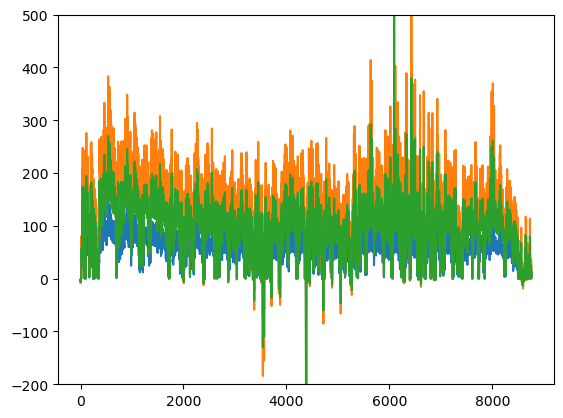

In [27]:
plt.plot(df_strom_pr_em_2023["Szenario Strompreis sinkt"])
plt.plot(df_strom_pr_em_2023["Szenario Strompreis steigt"])
plt.plot(df_strom_pr_em_2023["Strompreis"])
plt.ylim(-200,500)
plt.show()

In [28]:
df_strom_pr_em_2023.to_pickle("StromPreisEmissionenSensi.pkl")

In [17]:
strompreis_cost_sinkt = df_strom_pr_em_2023['Szenario Strompreis sinkt'].apply(lambda x: x if x >= 0 else 0)
strompreis_revenue_sinkt = df_strom_pr_em_2023['Szenario Strompreis sinkt'].apply(lambda x: abs(x) if x < 0 else 0)
strompreis_cost_sinkt = strompreis_cost_sinkt/1000 # €/MWh in €/kWh
strompreis_revenue_sinkt = strompreis_revenue_sinkt/1000

strompreis_cost_steigt = df_strom_pr_em_2023['Szenario Strompreis steigt'].apply(lambda x: x if x >= 0 else 0)
strompreis_revenue_steigt = df_strom_pr_em_2023['Szenario Strompreis steigt'].apply(lambda x: abs(x) if x < 0 else 0)
strompreis_cost_steigt = strompreis_cost_steigt/1000 # €/MWh in €/kWh
strompreis_revenue_steigt = strompreis_revenue_steigt/1000

strompreis_cost_sinkt.to_pickle("strompreis_cost_sinkt.pkl")
strompreis_revenue_sinkt.to_pickle("strompreis_revenue_sinkt.pkl")

strompreis_cost_steigt.to_pickle("strompreis_cost_steigt.pkl")
strompreis_revenue_steigt.to_pickle("strompreis_revenue_steigt.pkl")

3.1.3 Sensitivitätsanalyse Emissionen

In [72]:
blau_stromkauf = (0/255, 128/255, 180/255)

# Schritt 1: Standardisierung der Zeitreihe auf den Bereich [0, 1]
min_val = df_strom_pr_em_2023['Strompreis'].min()
max_val = df_strom_pr_em_2023['Strompreis'].max()
standardized_data = (df_strom_pr_em_2023['Strompreis'] - min_val) / (max_val - min_val)

# Schritt 2: Nicht-lineare Transformation mit Potenzfunktion, um mehr Werte in den Randbereichen zu erhalten und somit die Mitte zu stauchen des halb exponent kleiner 1
# +- 0.5, damit zu transformierende Daten symmetrisch
exponent = 0.5
transformed_data = np.sign(standardized_data - 0.5) * np.abs(standardized_data - 0.5)**exponent + 0.5

# Schritt 3: Rückskalierung auf den ursprünglichen Wertebereich
df_strom_pr_em_2023['Szenario Strompreis schwankt'] = transformed_data * (max_val - min_val) + min_val

# Schritt 4: Iterativ getestete Verschiebung, um das lokale Maximum auf 0 zu setzen und das globale auf 93
df_strom_pr_em_2023.loc[df_strom_pr_em_2023['Szenario Strompreis schwankt'] < 0, 'Szenario Strompreis schwankt'] += 100
df_strom_pr_em_2023.loc[df_strom_pr_em_2023['Szenario Strompreis schwankt'] > 35, 'Szenario Strompreis schwankt'] -= 206

# Schritt 5: Sicherstellen, dass es keine stärkeren Extrema gibt als die ursprünglichen min_val, max_val
df_strom_pr_em_2023['Szenario Strompreis schwankt'] = np.clip(df_strom_pr_em_2023['Szenario Strompreis schwankt'], min_val, max_val)


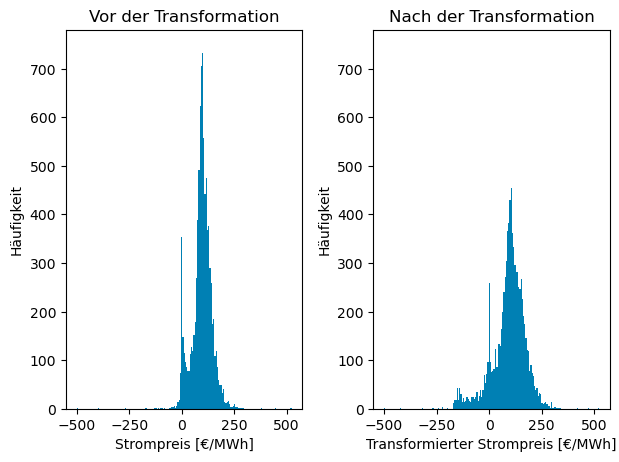

93.47575914316043


In [51]:
# Visualisierung der Verteilungen vor und nach der Transformation
fig, ax = plt.subplots(1, 2, figsize=(16/2.54, 12/2.54))

ax[0].hist(df_strom_pr_em_2023['Strompreis'], bins=175, color=blau_stromkauf)
ax[0].set_title('Vor der Transformation')
ax[0].set_xlabel('Strompreis [€/MWh]')
ax[0].set_ylabel('Häufigkeit')
ax[0].set_ylim(0, 780)

ax[1].hist(df_strom_pr_em_2023['Szenario Strompreis schwankt'], bins=175, color=blau_stromkauf)
ax[1].set_title('Nach der Transformation')
ax[1].set_xlabel('Transformierter Strompreis [€/MWh]')
ax[1].set_ylabel('Häufigkeit')
ax[1].set_ylim(0, 780)

plt.tight_layout()
#plt.savefig("StrompreisTransformiert.pdf")
plt.show()

print(df_strom_pr_em_2023["Szenario Strompreis schwankt"].mean())

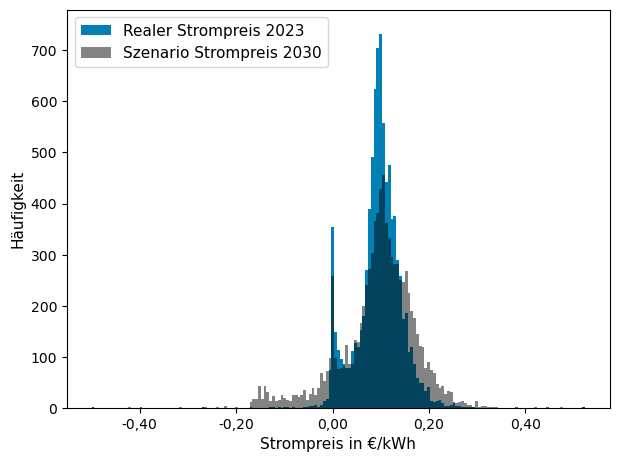

In [ ]:
def german_decimal_formatter(x, _):
    return f"{x:.1f}".replace('.', ',')

fig, ax = plt.subplots(figsize=(16/2.54, 12/2.54))

# Histogramm für den originalen Strompreis
ax.hist(df_strom_pr_em_2023['Strompreis']/1000, bins=175, label='Realer Strompreis 2023', color=blau_stromkauf)

# Histogramm für den transformierten Strompreis
ax.hist(df_strom_pr_em_2023['Szenario Strompreis schwankt']/1000, bins=175, label='Szenario Strompreis 2030', color=(8/255, 8/255, 8/255), alpha=0.5)

ax.set_xlabel('Strompreis in €/kWh', fontsize=11)
ax.set_ylabel('Häufigkeit', fontsize=11)
ax.set_ylim(0, 780)
ax.legend(loc="upper left", fontsize=11)
ax.xaxis.set_major_formatter(FuncFormatter(german_decimal_formatter))

plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("Abb5_20_StrompreisTransformiert.pdf")
plt.show()

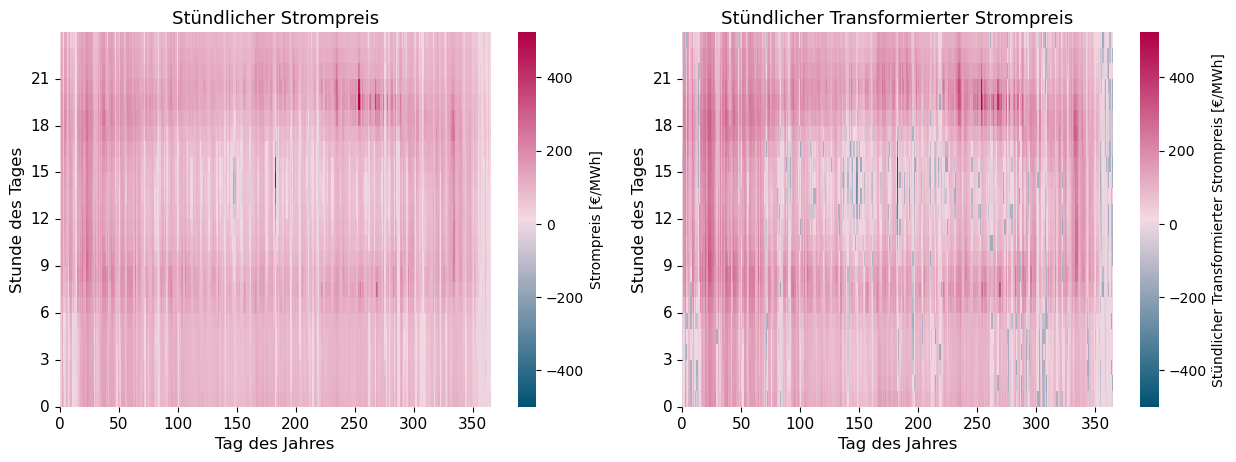

In [ ]:
color_strom = (0/255, 83/255, 116/255)  # RGB (0, 83, 116)
color_raumwaerme = (176/255, 0/255, 70/255)  # RGB (176, 0, 70)
color_raumwaerme_light = (243/255, 217/255, 227/255)
custom_cmap_blaurot = LinearSegmentedColormap.from_list("strom_zu_raumwaerme", [color_strom, color_raumwaerme_light, color_raumwaerme])

strompreis_matrix = df_strom_pr_em_2023['Strompreis'].values.reshape((365, 24))
strompreis_matrix = strompreis_matrix.T

strompreis_matrix_2 = df_strom_pr_em_2023['Szenario Strompreis schwankt'].values.reshape((365, 24))
strompreis_matrix_2 = strompreis_matrix_2.T

fig, ax = plt.subplots(1, 2, figsize=(16/2.54 * 2, 12/2.54))

# Linke Heatmap für "Strompreis 2023"
sns.heatmap(strompreis_matrix, cmap=custom_cmap_blaurot, annot=False, fmt=".2f", 
            yticklabels=range(24), xticklabels=range(1, 366), cbar_kws={'label': 'Strompreis [€/MWh]'}, ax=ax[0])

# Customize x-ticks: Show every 50st day
ax[0].set_xticks(np.arange(0, strompreis_matrix.shape[1], 50))
ax[0].set_xticklabels(np.arange(0, strompreis_matrix.shape[1] + 1, 50), fontsize=11, rotation=0)

# Customize y-ticks: Show every third hour
ax[0].set_yticks(np.arange(0, 24, 3))
ax[0].set_yticklabels(np.arange(0, 24, 3), fontsize=11)

ax[0].set_xlabel('Tag des Jahres', fontsize=12)
ax[0].set_ylabel('Stunde des Tages', fontsize=12)
ax[0].set_title('Stündlicher Strompreis', fontsize=13)
ax[0].invert_yaxis()

# Rechte Heatmap für "Strompreis 2030"
sns.heatmap(strompreis_matrix_2, cmap=custom_cmap_blaurot, annot=False, fmt=".2f", 
            yticklabels=range(24), xticklabels=range(1, 366), cbar_kws={'label': 'Stündlicher Transformierter Strompreis [€/MWh]'}, ax=ax[1])

# Customize x-ticks: Show every 50st day
ax[1].set_xticks(np.arange(0, strompreis_matrix_2.shape[1], 50))
ax[1].set_xticklabels(np.arange(0, strompreis_matrix_2.shape[1] + 1, 50), fontsize=11, rotation=0)

# Customize y-ticks: Show every third hour
ax[1].set_yticks(np.arange(0, 24, 3))
ax[1].set_yticklabels(np.arange(0, 24, 3), fontsize=11)

ax[1].set_xlabel('Tag des Jahres', fontsize=12)
ax[1].set_ylabel('Stunde des Tages', fontsize=12)
ax[1].set_title('Stündlicher Transformierter Strompreis', fontsize=13)
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [84]:
strompreis_cost_schwankt = df_strom_pr_em_2023['Szenario Strompreis schwankt'].apply(lambda x: x if x >= 0 else 0)
strompreis_revenue_schwankt = df_strom_pr_em_2023['Szenario Strompreis schwankt'].apply(lambda x: abs(x) if x < 0 else 0)
strompreis_cost_schwankt = strompreis_cost_schwankt/1000 # €/MWh in €/kWh
strompreis_revenue_schwankt = strompreis_revenue_schwankt/1000

strompreis_cost_schwankt.to_pickle("strompreis_cost_schwankt.pkl")
strompreis_revenue_schwankt.to_pickle("strompreis_revenue_schwankt.pkl")

## 3.2 Gas

### 3.2.1 Basisszenario

Quelle: https://www-genesis.destatis.de/genesis/online?operation=ergebnistabelleQualitaetSeparatAUS&levelindex=1&levelid=1718789676601&downloadname=61243-0014#abreadcrumb

Durchschnittspreise inkl.Steuern, Abgaben, Umlagen

Preise für Verbrauch zwischen 2 778 bis unter 27 778 MWh - wenn man nur BHKW für Strom und Heizungswasser betrachtet
falls die Zeitreihen gastest1 = df_bhkw_2023["Gasverbrauch Geb. 307 BHKW - ∅ - kW"] und gastest2 = df_2023["Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kW"] korrekt sind, wäre der Gesamtverbrauch höher

In [23]:
total_hours = 8760

# Erstelle eine Liste von Werten, im ersten Halbjahr 0.0811 EUR/kWh und im zweiten Halbjahr 0.0805
halbjahreswerte_2023 = [0.0876 if i < 4345 else 0.0805 for i in range(total_hours)]

# Erstelle den DataFrame mit einem Index von 1 bis 8760
gaspreis = pd.Series(halbjahreswerte_2023, index=range(0, total_hours))

### 3.2.2 Sensitivitätsanalyse

In [35]:
halbjahreswerte_2023_sensitivitätsanalyse = [0.0336 for i in range(total_hours)]
gaspreis_sensi = pd.Series(halbjahreswerte_2023_sensitivitätsanalyse, index=range(0, total_hours))

# 4. Daten für Basisszenario speichern

In [114]:
strom.to_pickle("stromverbrauch.pkl")
heizungswasser.to_pickle("heizungswasser.pkl")
strompreis_cost.to_pickle("strompreis_cost.pkl")
strompreis_revenue.to_pickle("strompreis_revenue.pkl")
stromemissionen.to_pickle("stromemissionen.pkl")
gaspreis.to_pickle("gaspreis.pkl")
gaspreis_sensi.to_pickle("gaspreisSensi.pkl")

# 5. BHKW Effizienzen berechnen

## 5.1 Gasverbrauchszzeitreihen explorieren

Die Zeitreihe "Gasverbrauch Geb. 307 BHKW - ∅ - kW" hat einen sehr komischen Verlauf à la 1 hohe Zahl, dann wieder 3-4 Stunden 0-Werte, dann wieder eine sehr hohe Zahl (das liegt wahrscheinlich am BHKW-Betrieb oder am Sensor). "Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kW" hat stündliche Werte im Normalbereich. In Summe passt es aber, weil der BHKW-Gasverbrauch geringer ist als der Gesamt-Gasverbrauch.

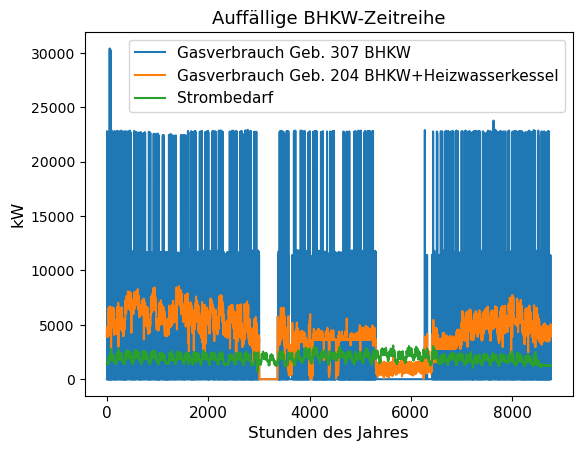

In [21]:
gastest1 = df_bhkw_2023["Gasverbrauch Geb. 307 BHKW - ∅ - kW"]#*0.36
gastest2 = df_2023["Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kW"]#*0.8493
plt.figure(figsize=(16/2.54, 12/2.54))
plt.plot(gastest1, label="Gasverbrauch Geb. 307 BHKW")
plt.plot(gastest2, label="Gasverbrauch Geb. 204 BHKW+Heizwasserkessel")
plt.plot(strom, label="Strombedarf")
plt.legend(fontsize=11)
plt.xlabel("Stunden des Jahres", fontsize=12)
plt.xticks(fontsize=11)
plt.ylabel("kW", fontsize=12)
plt.title("Auffällige BHKW-Zeitreihe", fontsize=13)
plt.show()

In [22]:
gastest1.sum()

28469819.319999997

In [23]:
gastest2.sum()

35922748.67

## 5.2 BHKW-Effizienzen berechnen

In [ ]:
bhkw_gas_in = df_bhkw_2023["Gasverbrauch Geb. 307 BHKW - ∅ - kW"]
# bhkw_gas_in = df_2023["Gasverbrauch Geb. 204 Einspeisung W5 - ∅ - kWh"] # inklusive Heizwasserkessel
bhkw_heizungswasser_out = df_bhkw_2023["Heizungswasser von BHKW307-Netz zu Geb. 201 301 407 - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 Absorbtionskälte - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 Notkühler - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 gesamt - ∅ - kW"]
bhkw_heizungswasser_out_2 = df_bhkw_2023["Heizungswassererzeugung Geb. 307 BHKW (ohne Notkühler) - ∅ - kW"] + df_bhkw_2023["Heizungswasser Geb. 307 Notkühler - ∅ - kW"]
bhkw_strom_out = df_bhkw_2023["Stromzähler Geb. 307 BHKW Generator Einspeisung - ∅ - kW"] + df_2023["Stromzähler W5 20kV-Ausspeisung Kaubendenstr. (Geb. 809) - ∅ - kW"] # Stromüberschuss/Netzeinspeisung ist NICHT irrelevant # wärmegeführt
bhkw_heisswasser_out = df_bhkw_2023["Heißwassererzeugung Geb. 307 aus BHKW - ∅ - kW"]
bhkw_wärme_out = bhkw_heizungswasser_out + bhkw_heisswasser_out

In [19]:
(bhkw_gas_in == 0).sum()

6173

In [20]:
bhkw_gas_in = process_series(bhkw_gas_in)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 30390.33
Minimum: 0.0
Median: 11396.37
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 2


In [21]:
bhkw_gas_in = process_outliers_000(bhkw_gas_in)

Median: 11396.37
Ausreißer-Werte: [22792.75, 22767.73, 30257.33, 22792.75, 22918.67, 22693.0, 22742.76, 22792.75, 22792.75, 22767.73, 22817.82, 22569.53, 22767.73, 22767.73, 22842.95, 22717.85, 22742.76, 22767.73, 22594.12, 22792.75, 22693.0, 22767.73, 22742.76, 22717.85, 22792.75, 22693.0, 22842.95, 22693.0, 22817.82, 22717.85, 22693.0, 22618.76, 22618.76, 22668.2, 22569.53, 22668.2, 22594.12, 22618.76, 22693.0, 22668.2, 22545.0, 22471.72, 22594.12, 22693.0, 22643.45, 22742.76, 22545.0, 22668.2, 22618.76, 22545.0, 22545.0, 22398.92, 22447.4, 22545.0, 22569.53, 22423.14, 22398.92, 22398.92, 22447.4, 22447.4, 22471.72, 22520.52, 22447.4, 22374.76, 22374.76, 22374.76, 22398.92, 22398.92, 22423.14, 22398.92, 22398.92, 22423.14, 22398.92, 22398.92, 22398.92, 22767.73, 22817.82, 22693.0, 22792.75, 22717.85, 22717.85, 22693.0, 22817.82, 22767.73, 22742.76, 22717.85, 22792.75, 22817.82, 22717.85, 22423.14, 22398.92, 22792.75, 22817.82, 22693.0, 22767.73, 22817.82, 22594.12, 22742.76, 22767.73

In [22]:
bhkw_wärme_out = process_outliers_000(bhkw_wärme_out)

Median: 1016.4300000000001
Ausreißer-Werte: [4980.55, 77734799.71, 23533074.26, 4975.1900000000005, 6462.79, 4971.52, 4969.92, 6927.280000000001, 5931.93, 4971.469999999999, 5946.6, 5953.99, 4983.21, 4991.9400000000005, 5437.139999999999, 4970.9]
Ausreißer-Indizes: [68, 82, 84, 1897, 1923, 1930, 2007, 2079, 2411, 2988, 6636, 7034, 7037, 7141, 7260, 7429]
Anzahl der Ausreißer: 16


Anzahl der NaN-Werte nach dem Setzen aller Ausreißer auf NaN: 17


In [25]:
bhkw_heizungswasser_out = process_series(bhkw_heizungswasser_out)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 0
Maximum: 4951.43
Minimum: 0.0
Median: 524.51
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 0


In [26]:
bhkw_heizungswasser_out = process_outliers_000(bhkw_heizungswasser_out)

Median: 524.51
Ausreißer-Werte: [2987.81, 2978.98, 3164.87, 4635.34, 3968.12, 3992.62, 2991.16, 2979.3900000000003, 3002.5099999999998, 2970.31, 3026.03, 3025.16, 3981.68, 2963.24, 3971.4, 3016.96, 3985.5, 3011.14, 3016.01, 3966.6, 3015.94, 2987.13, 2992.8399999999997, 3013.5600000000004, 2992.79, 3006.71, 3500.4, 2998.18, 2995.81, 2974.52, 2974.66, 3045.8100000000004, 2971.51, 2991.14, 2947.61, 3059.14, 3041.9100000000003, 2977.55, 3973.12, 2981.91, 3895.36, 2979.19, 2985.09, 2978.5600000000004, 2967.92, 2980.65, 2964.8, 2971.93, 3909.9, 2974.55, 3026.36, 2979.71, 3018.11, 3063.38, 3985.7200000000003, 3018.21, 3001.77, 3006.87, 3075.65, 2981.65, 2974.79, 2957.06, 3969.0499999999997, 2987.91, 2984.08, 2982.86, 3035.5099999999998, 3021.3800000000006, 2997.7599999999998, 3962.9, 4472.96, 4480.41, 3006.4500000000003, 3962.54, 3008.4199999999996, 2969.62, 2985.36, 4951.43, 2982.4500000000003, 2972.9900000000002, 2974.55, 2992.06, 3011.15, 2984.71, 3015.3599999999997, 2979.5899999999997, 30

In [27]:
bhkw_heizungswasser_out_2 = process_series(bhkw_heizungswasser_out_2)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 4953.139999999999
Minimum: 0.0
Median: 1001.11
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 1


In [28]:
bhkw_strom_out = process_series(bhkw_strom_out)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 2277.97
Minimum: 0.0
Median: 1426.89
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 1


In [29]:
bhkw_heisswasser_out = process_series(bhkw_heisswasser_out)

Anzahl der NaN-Werte vor dem Setzen der Extremwerte auf NaN: 1
Maximum: 2640.26
Minimum: 0.0
Median: 989.01
Anzahl der NaN-Werte nach dem Setzen der Extremwerte auf NaN: 2


In [30]:
bhkw_heisswasser_out = process_outliers_000(bhkw_heisswasser_out)

Median: 989.01
Ausreißer-Werte: [2628.7, 1971.52, 2628.7, 1973.68, 1969.37, 1973.68, 2622.95, 1978.02, 1973.68, 1975.85, 1971.52, 1973.68, 1975.85, 1973.68, 1978.02, 1969.37, 1984.56, 1978.02, 1975.85, 1975.85, 1978.02, 1973.68, 1978.02, 1978.02, 1975.85, 1969.37, 1973.68, 1978.02, 1973.68, 1973.68, 1978.02, 1969.37, 1975.85, 1980.2, 1971.52, 1980.2, 1982.38, 1962.92, 1965.07, 1960.78, 1956.52, 1962.92, 1954.4, 1967.21, 1962.92, 1958.65, 1962.92, 1945.95, 1958.65, 1954.4, 1969.37, 1962.92, 1954.4, 1969.37, 1960.78, 1973.68, 1965.07, 1962.92, 1969.37, 1941.75, 1948.05, 1956.52, 1945.95, 1956.52, 1954.4, 1991.15, 1956.52, 1956.52, 1948.05, 1952.28, 1943.84, 1943.84, 1948.05, 1950.16, 1948.05, 1958.65, 1952.28, 1952.28, 1952.28, 1954.4, 1948.05, 1948.05, 1950.16, 1956.52, 1941.75, 1941.75, 1941.75, 1941.75, 1941.75, 1941.75, 1941.75, 1943.84, 1943.84, 1943.84, 1941.75, 1943.84, 1945.95, 1943.84, 1943.84, 1945.95, 1943.84, 1943.84, 1982.38, 1969.37, 1986.75, 1980.2, 1975.85, 1973.68, 1969.

In [31]:
bhkw_heizungswasser_out.sum()

5899194.4635

In [32]:
bhkw_heizungswasser_out_2.sum()

6472829.74

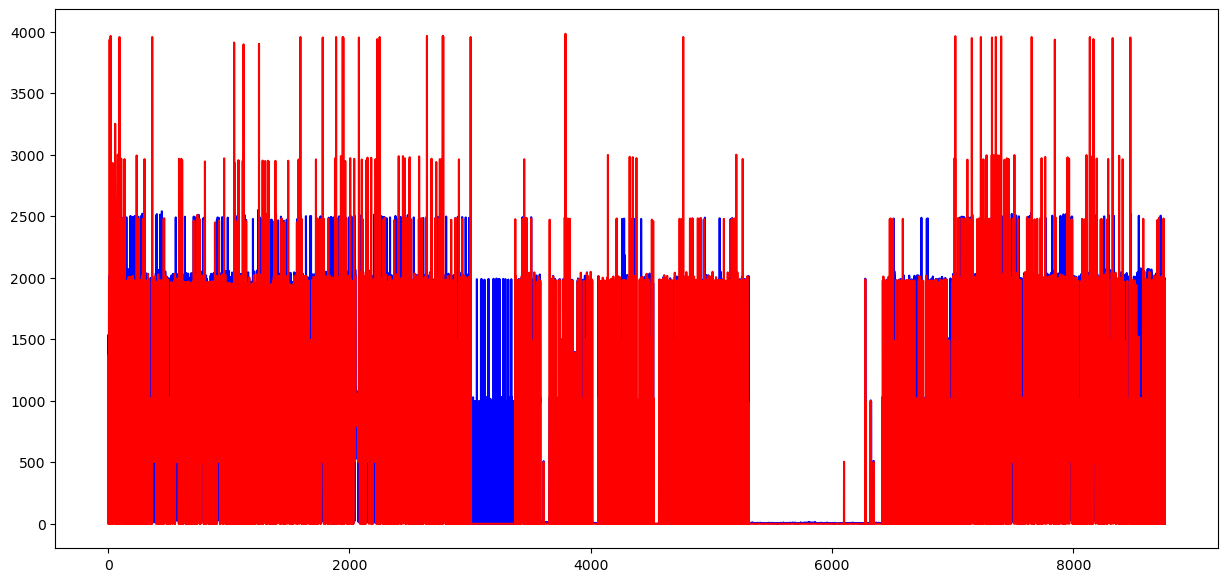

In [44]:
plt.figure(figsize=(15,7))
plt.plot(bhkw_heizungswasser_out, color="blue")
plt.plot(bhkw_heizungswasser_out_2, color="red")
plt.show()

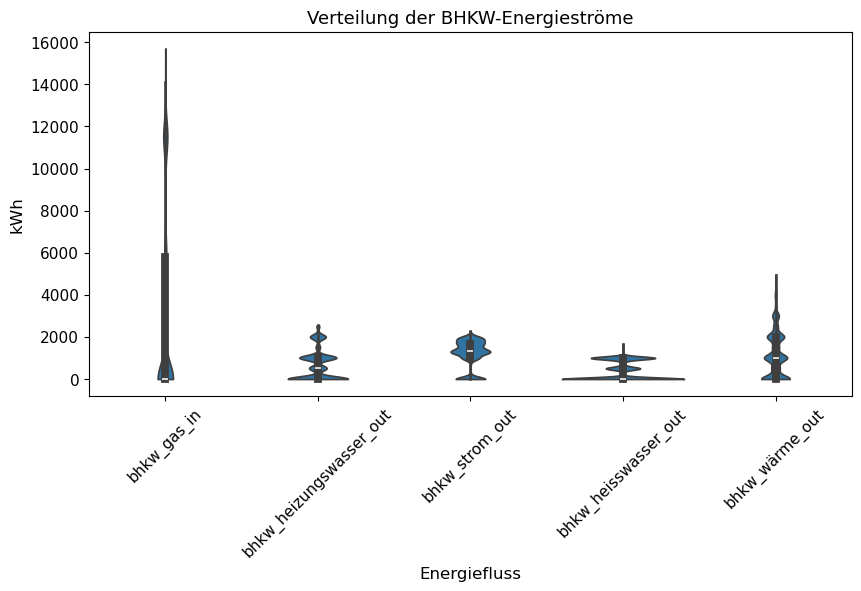

In [ ]:
bhkw_energiestroeme = pd.DataFrame({
    'bhkw_gas_in': bhkw_gas_in,
    'bhkw_heizungswasser_out': bhkw_heizungswasser_out,
    'bhkw_strom_out': bhkw_strom_out,
    'bhkw_heisswasser_out': bhkw_heisswasser_out,
    'bhkw_wärme_out': bhkw_wärme_out
})

bhkw_energiestroeme_melted = bhkw_energiestroeme.melt(var_name='Type', value_name='kWh')

plt.figure(figsize=(25/2.54, 12/2.54))
sns.violinplot(x='Type', y='kWh', data=bhkw_energiestroeme_melted, cut=0)
plt.xlabel('Energiefluss', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.ylabel('kWh', fontsize=12)
plt.yticks(fontsize=11)
plt.title('Verteilung der BHKW-Energieströme', fontsize=13)
plt.show()

Medianbildung funktioniert nicht, da es viele Stunden mit 0.0 kW gibt, daher Mittelwert

In [46]:
eta_heizungswasser = bhkw_energiestroeme['bhkw_heizungswasser_out'].mean() / bhkw_energiestroeme['bhkw_gas_in'].mean()
eta_strom = bhkw_energiestroeme['bhkw_strom_out'].mean() / bhkw_energiestroeme['bhkw_gas_in'].mean()
eta_heisswasser = bhkw_energiestroeme['bhkw_heisswasser_out'].mean() / bhkw_energiestroeme['bhkw_gas_in'].mean()
th_sum = eta_heisswasser + eta_heizungswasser
eta_wärme = bhkw_energiestroeme["bhkw_wärme_out"].mean() / bhkw_energiestroeme["bhkw_gas_in"].mean()
print(f"eta_wärme_gesamt: {eta_wärme: .4f}")
print(f"eta_th: {th_sum:.4f}")
print(f"eta_el: {eta_strom:.4f}")
total_sum = eta_heizungswasser + eta_heisswasser + eta_strom
print(f"sum: {eta_heizungswasser:.4f} + {eta_heisswasser:.4f} + {eta_strom:.4f} = {total_sum:.4f}")

eta_wärme_gesamt:  0.4113
eta_th: 0.3738
eta_el: 0.4225
sum: 0.2384 + 0.1354 + 0.4225 = 0.7963


Summenbildung hat sinnvolle Ergebnisse.

In [47]:
eta_heizungswasser = bhkw_energiestroeme['bhkw_heizungswasser_out'].sum() / bhkw_energiestroeme['bhkw_gas_in'].sum()
eta_strom = bhkw_energiestroeme['bhkw_strom_out'].sum() / bhkw_energiestroeme['bhkw_gas_in'].sum()
eta_heisswasser = bhkw_energiestroeme['bhkw_heisswasser_out'].sum() / bhkw_energiestroeme['bhkw_gas_in'].sum()
th_sum = eta_heisswasser + eta_heizungswasser
eta_wärme = bhkw_energiestroeme["bhkw_wärme_out"].sum() / bhkw_energiestroeme["bhkw_gas_in"].sum()
print(f"eta_wärme_gesamt: {eta_wärme: .4f}")
print(f"eta_th: {th_sum:.4f}")
print(f"eta_el: {eta_strom:.4f}")
total_sum = eta_heizungswasser + eta_heisswasser + eta_strom
print(f"sum: {eta_heizungswasser:.4f} + {eta_heisswasser:.4f} + {eta_strom:.4f} = {total_sum:.4f}")

eta_wärme_gesamt:  0.4113
eta_th: 0.3738
eta_el: 0.4225
sum: 0.2384 + 0.1354 + 0.4225 = 0.7963


Der folgende höher aufgelöste Ansatz muss verworfen werden, weil die Datenerfassung anscheinend zeitversetzt ist.

In [48]:
bhkw_energiestroeme['eta_heizungswasser'] = bhkw_energiestroeme['bhkw_heizungswasser_out'] / bhkw_energiestroeme['bhkw_gas_in']
bhkw_energiestroeme['eta_strom'] = bhkw_energiestroeme['bhkw_strom_out'] / bhkw_energiestroeme['bhkw_gas_in']
bhkw_energiestroeme['eta_heisswasser'] = bhkw_energiestroeme['bhkw_heisswasser_out'] / bhkw_energiestroeme['bhkw_gas_in']
bhkw_energiestroeme['sum'] = bhkw_energiestroeme["eta_heisswasser"] + bhkw_energiestroeme["eta_heizungswasser"] + bhkw_energiestroeme["eta_strom"]

In [49]:
eta_heisswasser_test = bhkw_energiestroeme[bhkw_energiestroeme["eta_heisswasser"] < 1]["eta_heisswasser"].mean()
eta_heizungswasser_test = bhkw_energiestroeme[bhkw_energiestroeme["eta_heizungswasser"] < 1]["eta_heizungswasser"].mean()
eta_strom_test = bhkw_energiestroeme[bhkw_energiestroeme["eta_strom"] < 1]["eta_strom"].mean()
print(eta_heisswasser_test)
print(eta_heizungswasser_test)
print(eta_strom_test)

0.056187466063146084
0.0976805330835113
0.1785048838590007


In [50]:
print(bhkw_energiestroeme["eta_heisswasser"].mean())
print(bhkw_energiestroeme["eta_heizungswasser"].mean())
print(bhkw_energiestroeme["eta_strom"].mean())

inf
inf
inf


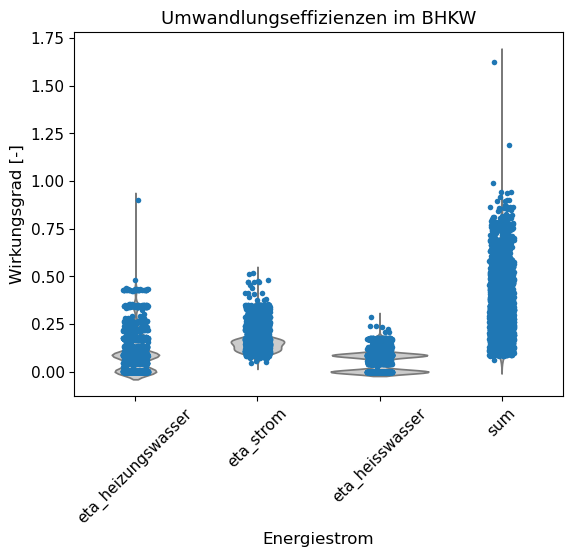

In [ ]:
sinaplot_data = bhkw_energiestroeme[['eta_heizungswasser', 'eta_strom', 'eta_heisswasser', 'sum']]
sinaplot_data_melted = sinaplot_data.melt(var_name='Type', value_name='Value')

plt.figure(figsize=(16/2.54, 12/2.54))
sns.violinplot(x='Type', y='Value', data=sinaplot_data_melted, inner=None, color=".8")
sns.stripplot(x='Type', y='Value', data=sinaplot_data_melted, jitter=True, size=4)
plt.xlabel('Energiestrom', fontsize=12)
plt.ylabel('Wirkungsgrad [-]', fontsize=12)
plt.title('Umwandlungseffizienzen im BHKW', fontsize=13)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## 5.3 Anteil Raumwärme an Gesamtwärme

In [ ]:
allokationsfaktor_raumwärme = heizungswasser.sum() / bhkw_wärme_out.sum()
allokationsfaktor_strom = allokationsfaktor_raumwärme # ist nicht 1, weil nur wenn Gas für Raumwärme erzeugt wird, wird auch Strom erzeugt
allokationsfaktor_gasemissionen = (allokationsfaktor_raumwärme + allokationsfaktor_strom) / 2
print(allokationsfaktor_gasemissionen)
print(allokationsfaktor_raumwärme)

# 6. PV-Zeitreihe erstellen und speichern

In [60]:
path_pv = os.path.join(cd, "ninja_pv_50.7728_6.1325_uncorrected.csv")
df_pv_2015 = pd.read_csv(path_pv, skiprows=3)

units = {
    "time": "UTC",
    "local_time": "Europe/Berlin",
    "electricity": "kW",
    "irradiance_direct": "unknown",
    "irradiance_diffuse": "unknown",
    "temperature": "ºC",
    "missing": "binary flag"
}
df_pv_2015.columns = [f'{col} ({units[col]})' if col in units else col for col in df_pv_2015.columns]

df_pv_2015.index = range(0, len(df_pv_2015))

pv = df_pv_2015['electricity (kW)']

In [61]:
# Skalierung Ninjas-Zeitreihe auf PVGis-Summe
mwh_pro_a_pvgis = 2239
mwh_pro_a_ninjas = pv.sum()/1000
skalierungsfaktor = mwh_pro_a_pvgis/mwh_pro_a_ninjas
pv_skaliert = skalierungsfaktor * pv

operationRateFix: If hasCapacityVariable is set to True (Ja), the values are given relative to the installed capacities (i.e. a value of 1 indicates a utilization of 100% of the capacity). If hasCapacityVariable is set to False, the values are given as absolute values in form of the commodityUnit for each time step.

In [62]:
pv_nennleistung = 2000 # kW_p
pv_normalisiert = pv_skaliert/pv_nennleistung

In [63]:
df_pv_2015['pv_scaled (kW)'] = pv_skaliert

df_pv_2015['time (UTC)'] = pd.to_datetime(df_pv_2015['time (UTC)'])
df_pv_2015.set_index('time (UTC)', inplace=True)

pv_hourly = df_pv_2015['pv_scaled (kW)'].resample('h').mean()

In [40]:
# Create a heatmap matrix
pv_matrix = pv_hourly.values.reshape(-1, 24).T

In [41]:
color_raumwaerme = (176/255, 0/255, 70/255)  # RGB (176, 0, 70)
color_raumwaerme_light = (243/255, 217/255, 227/255)
custom_cmap_rot = LinearSegmentedColormap.from_list("weiß_zu_raumwaerme", [color_raumwaerme_light, color_raumwaerme])

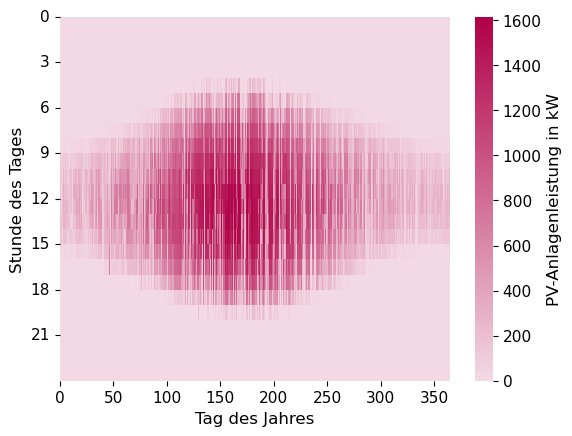

In [ ]:
# Create the heatmap
plt.figure(figsize=(16/2.54, 12/2.54))
ax = sns.heatmap(pv_matrix, cmap=custom_cmap_rot, cbar_kws={'label': 'PV-Erzeugung [kW]'})

# Customize x-ticks: Show every 50st day
ax.set_xticks(np.arange(0, pv_matrix.shape[1], 50))
ax.set_xticklabels(np.arange(0, pv_matrix.shape[1], 50), fontsize=11, rotation=0)

# Customize y-ticks: Show every third hour
ax.set_yticks(np.arange(0, 24, 3))
ax.set_yticklabels(np.arange(0, 24, 3), fontsize=11)

plt.xlabel('Tag des Jahres', fontsize=12)
plt.ylabel('Stunde des Tages', fontsize=12)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('PV-Anlagenleistung in kW', fontsize=12)

#plt.savefig("PVLeistung.pdf", format="pdf")

plt.show()

In [ ]:
pv_normalisiert.to_pickle("pv.pkl")

# 7. COP Wärmepumpe berechnen

Quelle: IRENA (2022) Heat pump cost and markets, S. 10 un d27

In [65]:
cop = 2.5
skalierung_sommer = 5.0 / 3.5
skalierung_ubergang = 4.1 / 3.5

index = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')
df_cop = pd.DataFrame(index=index)
df_cop['sCOP'] = cop

# Definieren der Jahreszeiten (Winter: Dezember, Januar, Februar; Sommer: Juni, Juli, August; Übergang: Rest)
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]
transition_months = [3, 4, 5, 9, 10, 11]

df_cop['sCOP'] = np.where(df_cop.index.month.isin(summer_months), skalierung_sommer * cop, df_cop['sCOP'])
df_cop['sCOP'] = np.where(df_cop.index.month.isin(transition_months), skalierung_ubergang * cop, df_cop['sCOP'])

df_cop.index = range(0, len(df_cop))

In [ ]:
df_cop.to_pickle("cop.pkl")

# 8. bigM schätzen

## 8.1 Wärmepumpe

In [66]:
print(heizungswasser.max()) # relevanter Auslegungswert

2858.84


## 8.2 LIB

In [64]:
strom.max() # 1h Strom speichern

3081.83

In [65]:
strom_agg = strom.groupby(strom.index // 4).sum() # über 4 Stunden Strom speichern können
print(strom_agg.max())
print(strom_agg.mean())

12042.27
7608.49554109589


In [66]:
surplus = pv_skaliert - strom # PV-Strom speichern
print(surplus.max())

290.9723497728344


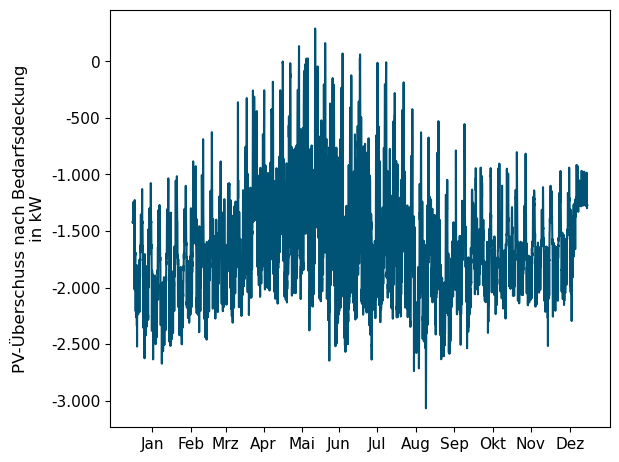

In [ ]:
# Mittlere Stundenpositionen für jeden Monat in einem nicht-Schaltjahr (8760 Stunden)
month_positions = [ 
    372,    # Januar
    1116,   # Februar
    1788,   # März
    2520,   # April
    3264,   # Mai
    3972,   # Juni
    4716,   # Juli
    5456,   # August
    6192,   # September
    6936,   # Oktober
    7670,   # November
    8424    # Dezember
]
month_labels = ["Jan", "Feb", "Mrz", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"]

def thousand_separator(x, _):
    return f"{x:,.0f}".replace(",", ".")

plt.figure(figsize=(16/2.54, 12/2.54))
plt.plot(surplus, color=(0/255, 83/255, 116/255))
plt.xticks(month_positions, month_labels, fontsize=11)
plt.ylabel("PV-Überschuss nach Bedarfsdeckung\nin kW", fontsize=12)
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_separator))
plt.tight_layout()
plt.savefig("Abb5_5_PVÜberschuss.pdf", format="pdf")
plt.show()

In [74]:
daily_surplus = surplus.groupby(surplus.index // 24).sum()

# Define seasons based on typical months
# Spring: March (59 days) - May (151 days)
# Summer: June (152 days) - August (243 days)
# Autumn: September (244 days) - November (334 days)
# Winter: December (335 days) - February (58 days)
spring_days = list(range(59, 152))
summer_days = list(range(152, 244))
autumn_days = list(range(244, 335))
winter_days = [i for i in range(len(daily_surplus)) if (i % 365 <= 58 or i % 365 >= 335)]

# ODER MAX?
# "nightly" surplus meint, dass der Strom nachts eingespeichert werden könnte, aber es handelt sich um den generell in 24h anfallenden Überschussstrom
def average_nightly_surplus(days):
    nightly_surplus = daily_surplus.iloc[days]
    average_nightly = nightly_surplus.apply(lambda x: x if x > 0 else 0).mean()
    return average_nightly

avg_nightly_spring = average_nightly_surplus(spring_days)
avg_nightly_summer = average_nightly_surplus(summer_days)
avg_nightly_autumn = average_nightly_surplus(autumn_days)
avg_nightly_winter = average_nightly_surplus(winter_days)

avg_nightly_storage = {
    'Spring': avg_nightly_spring,
    'Summer': avg_nightly_summer,
    'Autumn': avg_nightly_autumn,
    'Winter': avg_nightly_winter
}

avg_nightly_storage

{'Spring': 0.0, 'Summer': 0.0, 'Autumn': 0.0, 'Winter': 0.0}

## 8.3 Heizungswasserspeicher

In [ ]:
heizungswasser.max() # 1h speichern können

2858.84

In [ ]:
heizungswasser_agg = heizungswasser.groupby(heizungswasser.index //24).sum() # 24h
print(heizungswasser_agg.max())
print(heizungswasser_agg.mean())

28716.673333333332
12933.198621004567


In [ ]:
daily_heizungswasser = heizungswasser.groupby(heizungswasser.index //24).sum() # 24h nach Jahreszeiten

# Define seasons based on typical months
# Spring: March (59 days) - May (151 days)
# Summer: June (152 days) - August (243 days)
# Autumn: September (244 days) - November (334 days)
# Winter: December (335 days) - February (58 days)
spring_days = list(range(59, 152))
summer_days = list(range(152, 244))
autumn_days = list(range(244, 335))
winter_days = [i for i in range(len(daily_heizungswasser)) if (i % 365 <= 58 or i % 365 >= 335)]

def average_daily_heat_demand(days, daily_demand):
    total_daily_demand = daily_demand.iloc[days]
    return total_daily_demand.mean()

avg_daily_heat_spring = average_daily_heat_demand(spring_days, daily_heizungswasser)
avg_daily_heat_summer = average_daily_heat_demand(summer_days, daily_heizungswasser)
avg_daily_heat_autumn = average_daily_heat_demand(autumn_days, daily_heizungswasser)
avg_daily_heat_winter = average_daily_heat_demand(winter_days, daily_heizungswasser)

avg_daily_heat_demand = {
    'Spring': avg_daily_heat_spring,
    'Summer': avg_daily_heat_summer,
    'Autumn': avg_daily_heat_autumn,
    'Winter': avg_daily_heat_winter
}

avg_daily_heat_demand

{'Spring': 15156.50896057348,
 'Summer': 6178.2853804347815,
 'Autumn': 11400.854476190476,
 'Winter': 19159.350011235954}

# 9. Visualisierung

In [24]:
heizungswasserverbrauch = heizungswasser.copy()
stromverbrauch = strom.copy()
datetime_index = pd.date_range(start='2023-01-01 00:00', end='2023-12-31 23:00', freq='h')
stromverbrauch.index = datetime_index
heizungswasserverbrauch.index = datetime_index
stromverbrauch.name = "Stromverbrauch"
heizungswasserverbrauch.name = "Raumwärme"

In [25]:
df_strom_pr_em_2023_plot = df_strom_pr_em[df_strom_pr_em.index.year == 2023]
df_strom_pr_em_2023_plot.loc[:, "Strompreis"] = df_strom_pr_em_2023_plot["Strompreis"] / 1000  # €/MWh to €/kWh

In [26]:
datetime_index = pd.date_range(start='2023-01-01 00:00', end='2023-12-31 23:00', freq='h')
gaspreis_vis = pd.DataFrame(gaspreis, columns=["Gaspreis"])
gaspreis_vis.index = datetime_index

In [27]:
color_strom = (0/255, 83/255, 116/255)  # RGB (0, 83, 116)
color_raumwaerme = (176/255, 0/255, 70/255)  # RGB (176, 0, 70)

## 9.1 Bedarfe

In [27]:
import locale

# Versuche die Sprachumgebung auf Deutsch zu setzen
try:
    locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'de_DE')
    except locale.Error:
        print("Locale 'de_DE' not found. Proceeding with default locale.")

In [ ]:
def plot_verbrauch(stromverbrauch, heizungswasserverbrauch):
    # Jahresverbrauch berechnen und formatieren
    yearly_sum_mwh = {
        'Stromverbrauch [GWh]': stromverbrauch.sum() / (1000 * 1000),
        'Heizungswasserverbrauch [GWh]': heizungswasserverbrauch.sum() / (1000 * 1000)
    }

    stromverbrauch_gwh = f"{yearly_sum_mwh['Stromverbrauch [GWh]']:.2f}".replace('.', ',')
    heizungswasserverbrauch_gwh = f"{yearly_sum_mwh['Heizungswasserverbrauch [GWh]']:.2f}".replace('.', ',')

    def german_formatter(x, _):
        return f"{x:,.0f}".replace(",", ".")

    # Plot (a): Violinplot der Bedarfe
    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    sns.violinplot(data=[stromverbrauch, heizungswasserverbrauch],
                   cut=0, palette=[color_strom, color_raumwaerme], inner="quart")
    plt.xticks([0, 1], ['Strombedarf', 'Raumwärmebedarf'], fontsize=11)
    plt.ylabel("Leistung in kW", fontsize=11)
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))
    plt.title(f"Jahressummen der Bedarfe \n Strom: {stromverbrauch_gwh} GWh                  Raumwärme: {heizungswasserverbrauch_gwh} GWh", fontsize=11)
    plt.tight_layout()
    plt.savefig("Abb5_1_StromHeizungswasserVerbrauch_a.pdf", format="pdf")

    # Plot (b): Monatliche Durchschnittswerte
    monthly_avg_strom = stromverbrauch.resample('MS').mean()
    monthly_avg_heizungswasser = heizungswasserverbrauch.resample('MS').mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    plt.plot(monthly_avg_strom.index, monthly_avg_strom, label='Strombedarf', color=color_strom)
    plt.plot(monthly_avg_heizungswasser.index, monthly_avg_heizungswasser, label='Raumwärmebedarf', color=color_raumwaerme)
    plt.legend(fontsize=11, loc="center right")
    plt.ylabel("Leistung in kW", fontsize=11)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))

    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    plt.tight_layout()
    plt.savefig("Abb5_1_StromHeizungswasserVerbrauch_b.pdf", format="pdf")

    # Plot (c): Wochendurchschnittswerte
    weekly_avg_strom = stromverbrauch.groupby(stromverbrauch.index.dayofweek).mean()
    weekly_avg_heizungswasser = heizungswasserverbrauch.groupby(heizungswasserverbrauch.index.dayofweek).mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    days = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
    plt.plot(weekly_avg_strom.index, weekly_avg_strom, label='Strombedarf', color=color_strom)
    plt.plot(weekly_avg_heizungswasser.index, weekly_avg_heizungswasser, label='Raumwärmebedarf', color=color_raumwaerme)
    plt.xticks(ticks=range(7), labels=days, fontsize=11)
    plt.legend(fontsize=11, loc="center right")
    plt.ylabel("Leistung in kW", fontsize=11)
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))
    plt.ylim(0, 2200)

    plt.tight_layout()
    plt.savefig("Abb5_1_StromHeizungswasserVerbrauch_c.pdf", format="pdf")


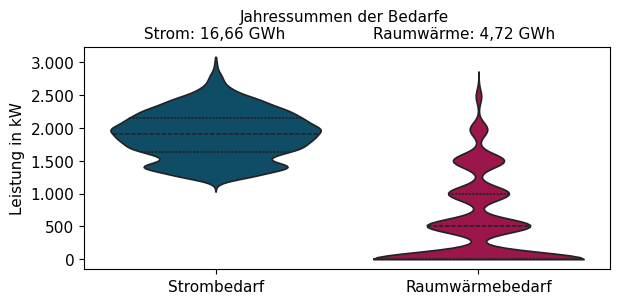

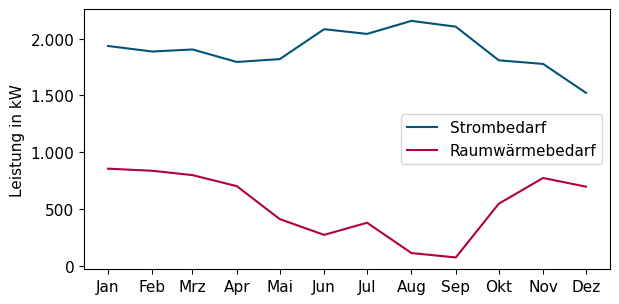

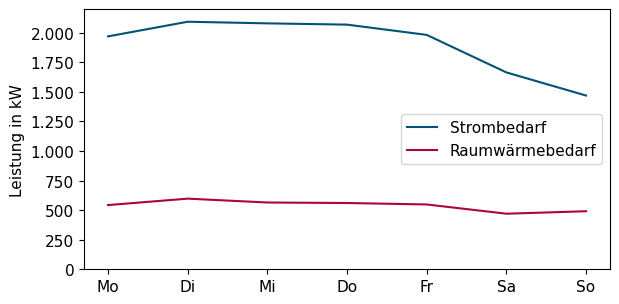

In [47]:
plot_verbrauch(stromverbrauch, heizungswasserverbrauch)

## 9.2 Preise

In [ ]:
def plot_preis(gaspreis, strompreisemissionen):
    # Jahresdurchschnittspreise berechnen und formatieren
    yearly_avg_prices = {
        'Strompreis [€/kWh]': strompreisemissionen['Strompreis'].mean(),
        'Gaspreis [€/kWh]': gaspreis['Gaspreis'].mean(),
    }

    strompreis_avg = f"{yearly_avg_prices['Strompreis [€/kWh]']:.3f}".replace('.', ',')
    gaspreis_avg = f"{yearly_avg_prices['Gaspreis [€/kWh]']:.3f}".replace('.', ',')

    def german_formatter(x, _):
        return f"{x:.2f}".replace('.', ',')

    # Plot (a): Violinplot der Preise
    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    sns.violinplot(data=[
        strompreisemissionen["Strompreis"],
        gaspreis["Gaspreis"]],
        bw_adjust=0.1, palette=[color_strom, color_raumwaerme], inner="quart")
    plt.xticks([0, 1], ['Strompreis', 'Gaspreis'], fontsize=11)
    plt.ylabel("Preise in €/kWh", fontsize=11)
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))
    plt.title(f"Jahresdurchschnitt Preise\n Strom: {strompreis_avg} €/kWh               Gas: {gaspreis_avg} €/kWh", fontsize=11)
    plt.tight_layout()
    plt.savefig("Abb5_3_PreisePlot_a.pdf", format="pdf")

    # Plot (b): Monatliche Durchschnittswerte
    monthly_avg_gas = gaspreis.resample('MS').mean()
    monthly_avg_strom = strompreisemissionen.resample('MS').mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    plt.plot(monthly_avg_strom.index, monthly_avg_strom['Strompreis'], label='Strompreis', color=color_strom)
    plt.plot(monthly_avg_gas.index, monthly_avg_gas['Gaspreis'], label='Gaspreis', color=color_raumwaerme)
    plt.ylabel("Preise in €/kWh", fontsize=11)
    plt.legend(fontsize=11, loc="upper right")
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))

    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    plt.tight_layout()
    plt.savefig("Abb5_3_PreisePlot_b.pdf", format="pdf")

    # Plot (c): Wochendurchschnittswerte
    weekly_avg_strom = strompreisemissionen.groupby(strompreisemissionen.index.dayofweek).mean()
    weekly_avg_gas = gaspreis.groupby(gaspreis.index.dayofweek).mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    days = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
    plt.plot(weekly_avg_strom.index, weekly_avg_strom['Strompreis'], label='Strompreis', color=color_strom)
    plt.plot(weekly_avg_gas.index, weekly_avg_gas['Gaspreis'], label='Gaspreis', color=color_raumwaerme)
    plt.xticks(ticks=range(7), labels=days, fontsize=11)
    plt.ylabel("Preise in €/kWh", fontsize=11)
    plt.legend(fontsize=11, loc="upper right")
    plt.yticks(fontsize=11)
    plt.ylim(0.067, 0.131)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(german_formatter))

    plt.tight_layout()
    plt.savefig("Abb5_3_PreisePlot_c.pdf", format="pdf")


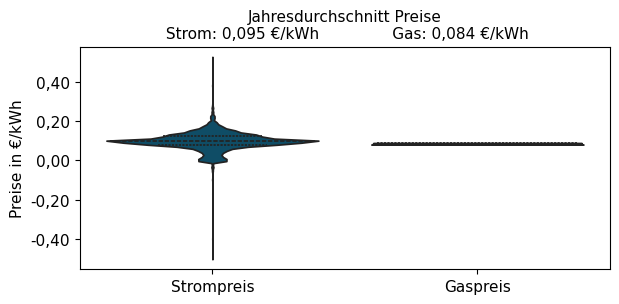

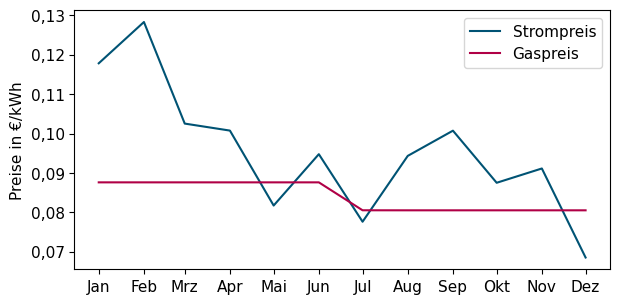

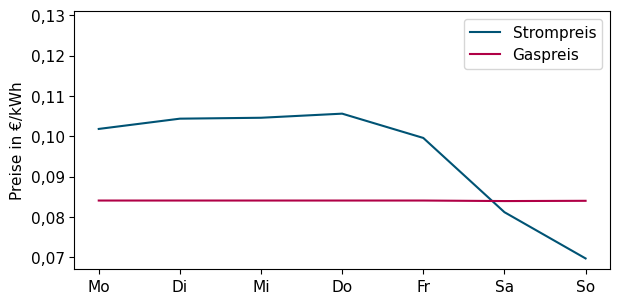

In [71]:
plot_preis(gaspreis_vis, df_strom_pr_em_2023_plot)

In [52]:
color_raumwaerme = (176/255, 0/255, 70/255)  # RGB (176, 0, 70)
color_raumwaerme_light = (243/255, 217/255, 227/255)
color_strom = (0/255, 83/255, 116/255)
color_strom_light = (217/255, 229/255, 234/255)
custom_cmap_rot = LinearSegmentedColormap.from_list("weiß_zu_raumwaerme", [color_raumwaerme_light, color_raumwaerme])
#custom_cmap_blaurot = LinearSegmentedColormap.from_list("strom_zu_raumwaerme", [(124/255, 205/255, 239/255), (190/255, 30/255, 70/255)])
custom_cmap_blaurot = LinearSegmentedColormap.from_list("strom_zu_raumwaerme", [color_strom, color_raumwaerme_light, color_raumwaerme])

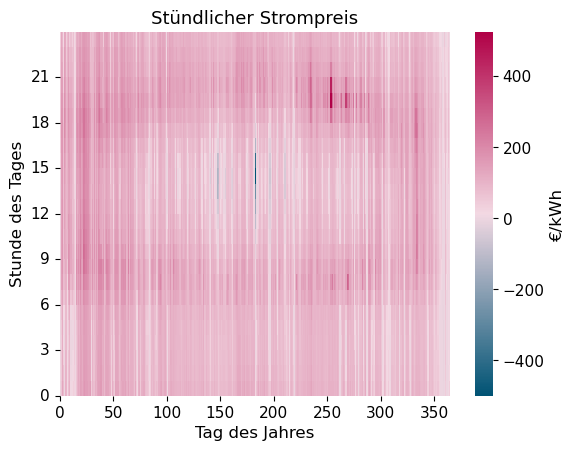

In [ ]:
strompreis_matrix = df_strom_pr_em_2023['Strompreis'].values.reshape((365, 24))
strompreis_matrix = strompreis_matrix.T

plt.figure(figsize=(16/2.54, 12/2.54))
ax = sns.heatmap(strompreis_matrix, cmap=custom_cmap_blaurot, annot=False, fmt=".2f", yticklabels=range(24), xticklabels=range(1, 366), cbar_kws={'label': 'Strompreis [€/kWh]'})

# Customize x-ticks: Show every 50st day
ax.set_xticks(np.arange(0, strompreis_matrix.shape[1], 50))
ax.set_xticklabels(np.arange(0, strompreis_matrix.shape[1] + 1, 50), fontsize=11, rotation=0)

# Customize y-ticks: Show every third hour
ax.set_yticks(np.arange(0, 24, 3))
ax.set_yticklabels(np.arange(0, 24, 3), fontsize=11)

plt.xlabel('Tag des Jahres', fontsize=12)
plt.ylabel('Stunde des Tages', fontsize=12)
plt.title('Stündlicher Strompreis', fontsize=13)

ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('€/kWh', fontsize=12)

#plt.savefig("StrompreisHeatmap.pdf", format="pdf")

plt.show()

## 9.3 Emissionen

In [28]:
gasemissionen = pd.DataFrame({'Gasemissionen [g/kWh]': [200.8] * 8760})
gasemissionen.index = pd.date_range(start='2023-01-01', periods=8760, freq='h')

In [29]:
def plot_emissionen(strompreisemissionen, gasemissionen):
    # Jahresdurchschnittswerte berechnen und formatieren
    yearly_sum = {
        'Stromemissionen [g/kWh]': strompreisemissionen["CO₂-Emissionsfaktor des Strommix"].mean(),
        "Gasemissionen [g/kWh]": gasemissionen["Gasemissionen [g/kWh]"].mean()
    }

    stromemission_avg = f"{yearly_sum['Stromemissionen [g/kWh]']:.1f}".replace('.', ',')
    gasemission_avg = f"{yearly_sum['Gasemissionen [g/kWh]']:.1f}".replace('.', ',')

    # Plot (a): Violinplot der Emissionen
    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    sns.violinplot(data=[
        strompreisemissionen["CO₂-Emissionsfaktor des Strommix"], 
        gasemissionen["Gasemissionen [g/kWh]"]],
        cut=0, palette=[color_strom, color_raumwaerme], inner="quart")
    plt.xticks([0, 1], ['Stromemissionen', "Gasemissionen"], fontsize=11)
    plt.ylabel("Emissionen in g/kWh", fontsize=11)
    plt.yticks(fontsize=11)
    plt.title(f"Jahresdurchschnitt Emissionen\n Strom: {stromemission_avg} g/kWh               Gas: {gasemission_avg} g/kWh", fontsize=11)
    plt.tight_layout()
    plt.savefig("Abb5_4_EmissionenPlot_a.pdf", format="pdf")

    # Plot (b): Monatliche Durchschnittswerte
    monthly_avg_strompreisemissionen = strompreisemissionen.resample('MS').mean()
    monthly_avg_gasemissionen = gasemissionen.resample("MS").mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    plt.plot(monthly_avg_strompreisemissionen.index, monthly_avg_strompreisemissionen["CO₂-Emissionsfaktor des Strommix"], 
             label='Stromemissionen', color=color_strom)
    plt.plot(monthly_avg_gasemissionen.index, monthly_avg_gasemissionen["Gasemissionen [g/kWh]"], 
             label="Gasemissionen", color=color_raumwaerme)
    plt.legend(fontsize=11, loc="center right")
    plt.ylabel("Emissionen in g/kWh", fontsize=11)
    plt.ylim(190, 440)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    plt.tight_layout()
    plt.savefig("Abb5_4_EmissionenPlot_b.pdf", format="pdf")

    # Plot (c): Wochendurchschnittswerte
    weekly_avg_strompreisemissionen = strompreisemissionen.groupby(strompreisemissionen.index.dayofweek).mean()
    weekly_avg_gasemissionen = gasemissionen.groupby(gasemissionen.index.dayofweek).mean()

    plt.figure(figsize=(16 / 2.54, 8 / 2.54))
    days = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
    plt.plot(weekly_avg_strompreisemissionen.index, weekly_avg_strompreisemissionen["CO₂-Emissionsfaktor des Strommix"], 
             label='Stromemissionen', color=color_strom)
    plt.plot(weekly_avg_gasemissionen.index, weekly_avg_gasemissionen["Gasemissionen [g/kWh]"], 
             label='Gasemissionen', color=color_raumwaerme)
    plt.xticks(ticks=range(7), labels=days, fontsize=11)
    plt.ylabel("Emissionen in g/kWh", fontsize=11)
    plt.legend(fontsize=11, loc="upper right")
    plt.ylim(190, 440)
    plt.yticks(fontsize=11)

    plt.tight_layout()
    plt.savefig("Abb5_4_EmissionenPlot_c.pdf", format="pdf")

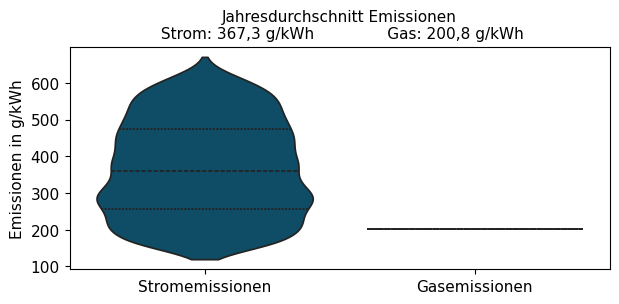

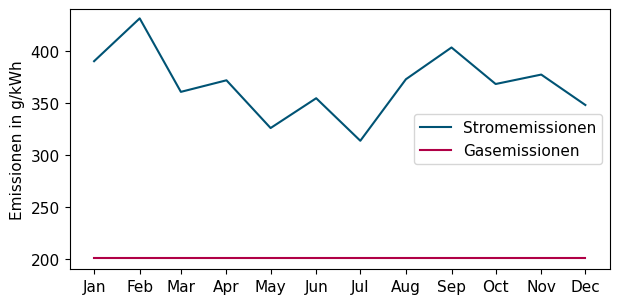

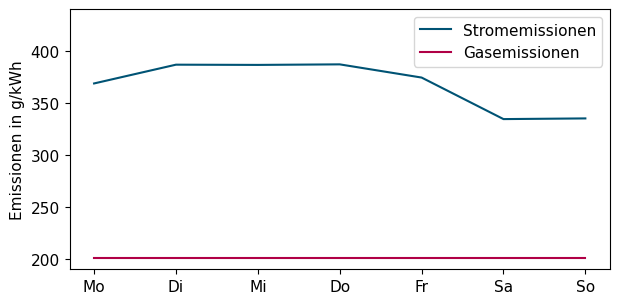

In [30]:
plot_emissionen(df_strom_pr_em_2023_plot, gasemissionen)

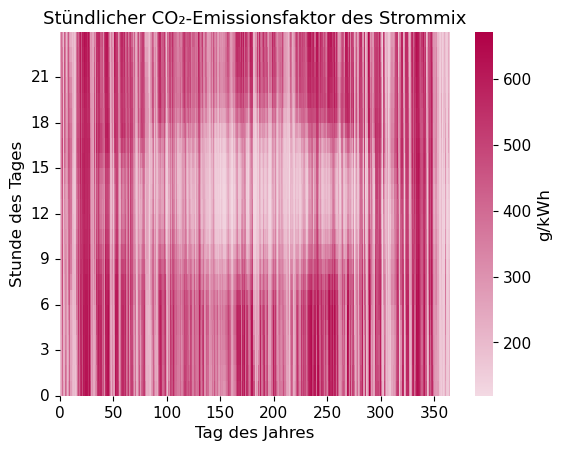

In [ ]:
stromemissionen_matrix = df_strom_pr_em_2023['CO₂-Emissionsfaktor des Strommix'].values.reshape((365, 24))
stromemissionen_matrix = stromemissionen_matrix.T

plt.figure(figsize=(16/2.54, 12/2.54))
ax = sns.heatmap(stromemissionen_matrix, cmap=custom_cmap_rot, annot=False, fmt=".2f", yticklabels=range(24), xticklabels=range(1, 366), cbar_kws={'label': 'CO₂-Emissionsfaktor des Strommix [g/kWh]'})

# Customize x-ticks: Show every 50st day
ax.set_xticks(np.arange(0, stromemissionen_matrix.shape[1], 50))
ax.set_xticklabels(np.arange(0, stromemissionen_matrix.shape[1] + 1, 50), fontsize=11, rotation=0)

# Customize y-ticks: Show every third hour
ax.set_yticks(np.arange(0, 24, 3))
ax.set_yticklabels(np.arange(0, 24, 3), fontsize=11)

plt.xlabel('Tag des Jahres', fontsize=12)
plt.ylabel('Stunde des Tages', fontsize=12)
plt.title('Stündlicher CO₂-Emissionsfaktor des Strommix', fontsize=13)

ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('g/kWh', fontsize=12)

#plt.savefig("StromemissionenHeatmap.pdf", format="pdf")

plt.show()